# This file shows how to run the PROPER models from wfirst_phaseb_proper. These were what were used for timing tests and the results were waved from here to be compared with POPPY results. 

In [1]:
import wfirst_phaseb_proper
import numpy as np
import astropy.io.fits as fits 
import astropy.units as u
import time

from IPython.display import clear_output
from matplotlib.patches import Circle

import proper

from importlib import reload
import misc
reload(misc)

wfirst_phaseb_proper.copy_here()
data_dir = '/groups/douglase/phaseb_data'

## Enable or disable pyFFTW or MKL for PROPER. 

In [2]:
proper.prop_use_fftw(DISABLE=True)
# proper.prop_fftw_wisdom( 2048 ) 

In [3]:
proper.prop_use_ffti(DISABLE=True)
# proper.prop_use_ffti(DISABLE=False, 
#                      MKL_DIR="/opt/ohpc/pub/compiler/intel_2020_u4/compilers_and_libraries/linux/mkl/lib/intel64_lin")

Intel MKL Library not found. Using Numpy FFT.


In [10]:
import os
import ctypes
mkl_dir = "/opt/ohpc/pub/compiler/intel_2020_u4/compilers_and_libraries/linux/mkl/lib/intel64_lin"
mkl_lib = os.path.join(mkl_dir, 'libmkl_rt.so')
ctypes.cdll.LoadLibrary(mkl_lib)

<CDLL '/opt/ohpc/pub/compiler/intel_2020_u4/compilers_and_libraries/linux/mkl/lib/intel64_lin/libmkl_rt.so', handle 55a8e6e20d50 at 0x7f1f191ddcf8>

# HLC

Lambda = 5.7500E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to FOLD_1
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to FOLD_2
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT_STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to LENS
Applying lens
Propagating to FOLD_4
Propagating to IMAGE
Total elapsed time (seconds) =  10.6753
3.3609467264964907e-06 m / pix


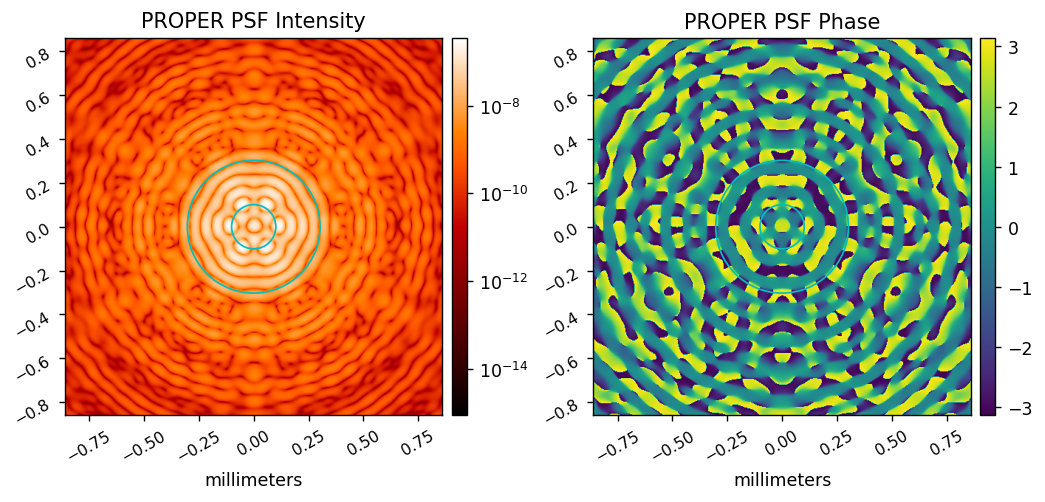

In [14]:
nlam = 1
lam_array = np.array([0.575])
n = 512                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 0
use_fpm = 1

use_errors = 0
use_hlc_dm_patterns = 0
use_dm1 = 0
use_dm2 = 0
dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/hlc_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/hlc_with_aberrations_dm2.fits' )
polaxis = 0
use_fieldstop = 0

(wfs, wfs_sampling_m) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'hlc',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_hlc_dm_patterns':use_hlc_dm_patterns,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'use_field_stop':use_fieldstop,
                                                           'polaxis':polaxis,
                                                           'data_dir':data_dir} )

psf_wf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 3/final_sampling*psf_sampling_m.value * 1000 # inner and outer working angles in units of m
outwa = 9/final_sampling*psf_sampling_m.value * 1000
patches1 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
patches2 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
print(psf_sampling_m)
misc.myimshow2(np.abs(psf_wf)**2, np.angle(wfs[0]),
               'PROPER PSF Intensity', 'PROPER PSF Phase',
               pxscl=psf_sampling_m.to(u.mm/u.pix),
               lognorm1=True, cmap1='gist_heat', cmap2='viridis',
               patches1=patches1, patches2=patches2)

save=False
if save:
    wf = np.zeros(shape=(2,n,n))
    wf[0,:,:] = np.abs(wfs[0])**2
    wf[1,:,:] = np.angle(wfs[0])

    wf_fname = 'proper-psfs/hlc/proper_psf_offax_nofs.fits'

    hdr = fits.Header()
    hdr['PIXELSCL'] = psf_sampling_m.value
    hdr['PIXSCLLD'] = final_sampling
    wf_hdu = fits.PrimaryHDU(data=wf, header=hdr)
    wf_hdu.writeto(wf_fname, overwrite=True)

# SPC-spec

Lambda = 7.3000E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to FOLD_1
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to FOLD_2
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT_STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to LENS
Applying lens
Propagating to FOLD_4
Propagating to IMAGE
Total elapsed time (seconds) = 172.5121
4.266928396341947e-06 m / pix


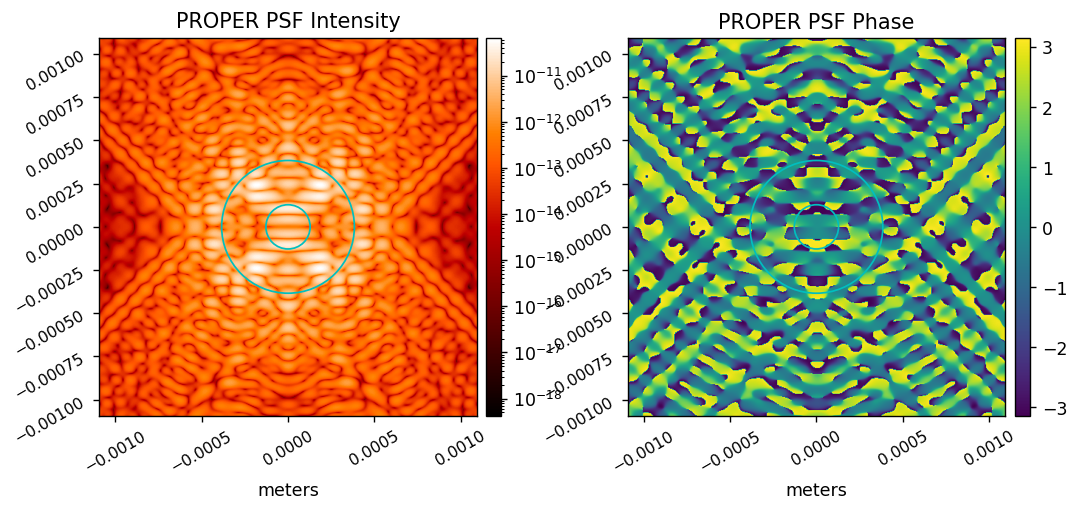

In [6]:
nlam = 1
lam_array = np.array([0.730])
n = 512                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 0
use_fpm = 1

use_errors = 0
use_dm1 = 0
use_dm2 = 0
dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-spec_long_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-spec_long_with_aberrations_dm2.fits' )
polaxis = 0

(wfs, wfs_sampling_m) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'spc-spec_long',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'polaxis':polaxis,
                                                           'data_dir':data_dir} )

psf_wf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 3/final_sampling*psf_sampling_m.value # inner and outer working angles in units of m
outwa = 9/final_sampling*psf_sampling_m.value
patches1 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
patches2 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
print(psf_sampling_m)
misc.myimshow2(np.abs(psf_wf)**2, np.angle(wfs[0]),
               'PROPER PSF Intensity', 'PROPER PSF Phase',
               pxscl=psf_sampling_m,
               lognorm1=True, cmap1='gist_heat', cmap2='viridis',
               patches1=patches1, patches2=patches2)

save=False
if save:
    wf = np.zeros(shape=(2,n,n))
    wf[0,:,:] = np.abs(wfs[0])**2
    wf[1,:,:] = np.angle(wfs[0])

    wf_fname = Path('proper-psfs/spc-spec/proper_psf_offax_opds_dms.fits')

    hdr = fits.Header()
    hdr['PIXELSCL'] = psf_sampling_m.value
    hdr['PIXSCLLD'] = final_sampling
    wf_hdu = fits.PrimaryHDU(data=wf, header=hdr)
    wf_hdu.writeto(wf_fname, overwrite=True)

In [7]:
tot = 172.1+172.8+172.5
tot/3

172.46666666666667

# SPC-wide

Lambda = 8.2500E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to FOLD_1
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to FOLD_2
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT_STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to LENS
Applying lens
Propagating to FOLD_4
Propagating to IMAGE
Total elapsed time (seconds) = 139.1764
4.8222031453887805e-06 m / pix


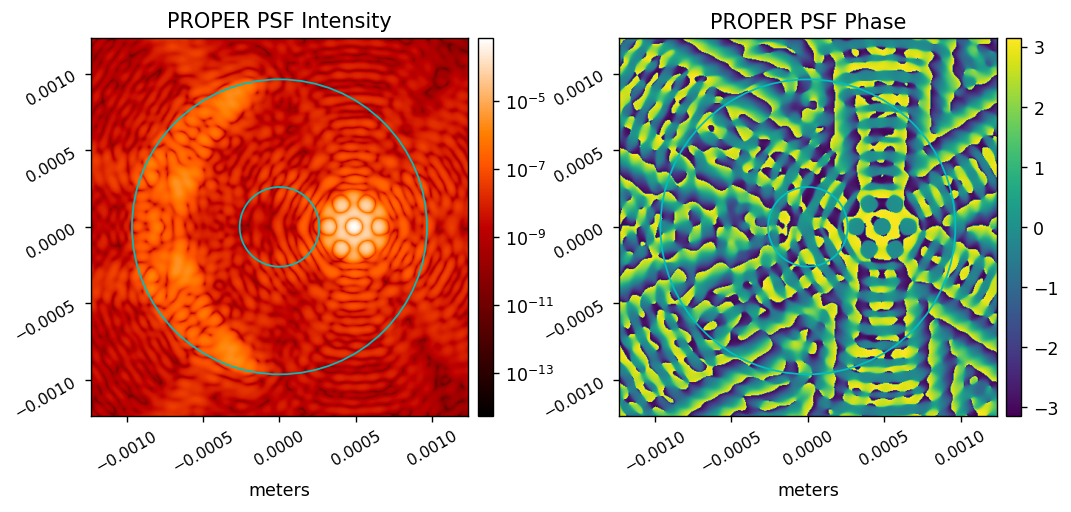

In [7]:
nlam = 1
lam_array = np.array([0.825])
n = 512                 # output image dimension (must be power of 2)
final_sampling = 0.1    # output sampling in lam0/D

xoffset = 10
use_fpm = 1

use_errors = 1
use_dm1 = 1
use_dm2 = 1
dm1 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-wide_with_aberrations_dm1.fits' )
dm2 = proper.prop_fits_read( wfirst_phaseb_proper.lib_dir + '/examples/spc-wide_with_aberrations_dm2.fits' )
polaxis = 10

(wfs, wfs_sampling_m) = proper.prop_run_multi('wfirst_phaseb', lam_array, n, QUIET=False, 
                                                PASSVALUE={'cor_type':'spc-wide',
                                                           'final_sampling_lam0':final_sampling, 
                                                           'source_x_offset':xoffset,
                                                           'use_fpm':use_fpm,
                                                           'use_errors': use_errors,
                                                           'use_dm1':use_dm1, 'dm1_m':dm1, 
                                                           'use_dm2':use_dm2, 'dm2_m':dm2,
                                                           'polaxis':polaxis,
                                                           'data_dir':data_dir} )

psf_wf = wfs[0]
psf_sampling_m = wfs_sampling_m[0]*u.m/u.pix

reload(misc)
innwa = 5.4/final_sampling*psf_sampling_m.value # inner and outer working angles in units of m
outwa = 20/final_sampling*psf_sampling_m.value
patches1 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
patches2 = [Circle((0,0),innwa,edgecolor='c', facecolor='none',lw=1),
            Circle((0,0),outwa,edgecolor='c', facecolor='none',lw=1)]
print(psf_sampling_m)
misc.myimshow2(np.abs(psf_wf)**2, np.angle(wfs[0]),
               'PROPER PSF Intensity', 'PROPER PSF Phase',
               pxscl=psf_sampling_m,
               lognorm1=True, cmap1='gist_heat', cmap2='viridis',
               patches1=patches1, patches2=patches2)

save=False
if save:
    wf = np.zeros(shape=(2,n,n))
    wf[0,:,:] = np.abs(wfs[0])**2
    wf[1,:,:] = np.angle(wfs[0])

    wf_fname = Path('proper-psfs/spc-wide/proper_psf_offax_opds_dms.fits')

    hdr = fits.Header()
    hdr['PIXELSCL'] = psf_sampling_m.value
    hdr['PIXSCLLD'] = final_sampling
    wf_hdu = fits.PrimaryHDU(data=wf, header=hdr)
    wf_hdu.writeto(wf_fname, overwrite=True)